## Part h: Cross-validation and resampling techniques

In [60]:
# Import libraies and functions:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import KFold, cross_val_score



# import our own implementations
import importlib, OLS, prepare_data, polynomial_features,K_fold
importlib.reload(OLS)
importlib.reload(prepare_data)
importlib.reload(polynomial_features)

from prepare_data import prepare_data
from polynomial_features import polynomial_features
from OLS import OLS_parameters
from Ridge import Ridge_parameters

# Styling function
from Set_latex_params import set_mpl_latex_style
set_mpl_latex_style()

In [61]:
#Prepare data
X, y, _, _, _, _, y_noisy = prepare_data(n=100)


We use lambda = $1^{-5}$ that we found were the most optimal in earlier analysis

We first made our own pipeline with a K-fold splitting algorithm we made ourselves. But for some reason Lasso regression got stuck in processing so we pivoted to instead using the library from sci-kit learn where we ended up using the premade cross_val_score.

CV for k = 5

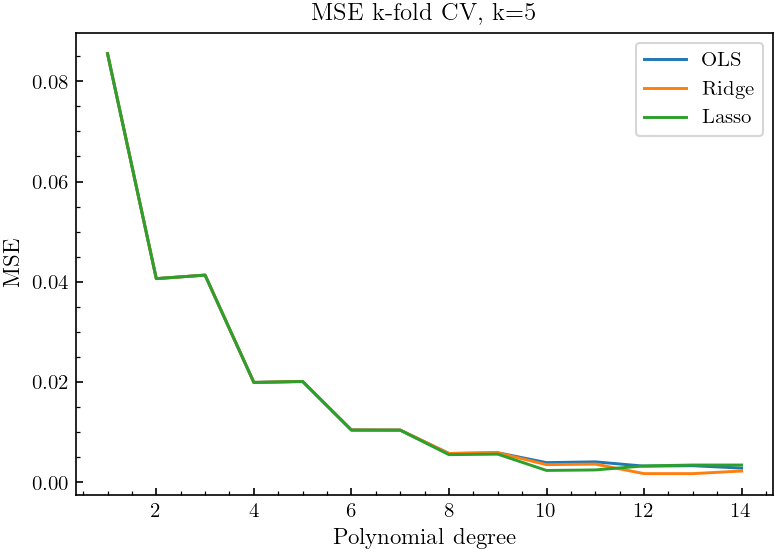

In [62]:
X = x.reshape(-1, 1)

rs = 6114
kfold = KFold(n_splits=5, shuffle=True, random_state=rs)
degrees = range(1, 15)
alpha_fixed = 1e-5

rows = []

mses_ols = []
mses_ridge = []
mses_lasso = []

for deg in degrees:
    poly = PolynomialFeatures(degree=deg, include_bias=False)
    scale = StandardScaler()

    # OLS
    ols_pipe = Pipeline([
        ("poly", poly),
        ("scale", scale),
        ("ols", LinearRegression())
    ])
    ols_scores = cross_val_score(ols_pipe, X, y, cv=kfold, scoring="neg_mean_squared_error")
    ols_mse = -ols_scores.mean()

    # Ridge
    ridge_pipe = Pipeline([
        ("poly", poly),
        ("scale", scale),
        ("ridge", Ridge(alpha=alpha_fixed, fit_intercept=True, random_state=rs))
    ])
    ridge_scores = cross_val_score(ridge_pipe, X, y, cv=kfold, scoring="neg_mean_squared_error")
    ridge_mse = -ridge_scores.mean()

    # Lasso
    lasso_pipe = Pipeline([
        ("poly", poly),
        ("scale", scale),
        ("lasso", Lasso(alpha=alpha_fixed, fit_intercept=True, max_iter=10000000, random_state=rs))
    ])
    lasso_scores = cross_val_score(lasso_pipe, X, y, cv=kfold, scoring="neg_mean_squared_error")
    lasso_mse = -lasso_scores.mean()

    mses_ols.append(ols_mse)
    mses_ridge.append(ridge_mse)
    mses_lasso.append(lasso_mse)

plt.plot(degrees,mses_ols,label="OLS")
plt.plot(degrees,mses_ridge,label="Ridge")
plt.plot(degrees,mses_lasso,label="Lasso")
plt.xlabel("Polynomial degree")
plt.ylabel("MSE")
plt.title(f"MSE k-fold CV, k={5}")
plt.legend()
plt.savefig("Plots/mse_k_fold_5.pdf", bbox_inches="tight")
plt.show()

CV for k = 20

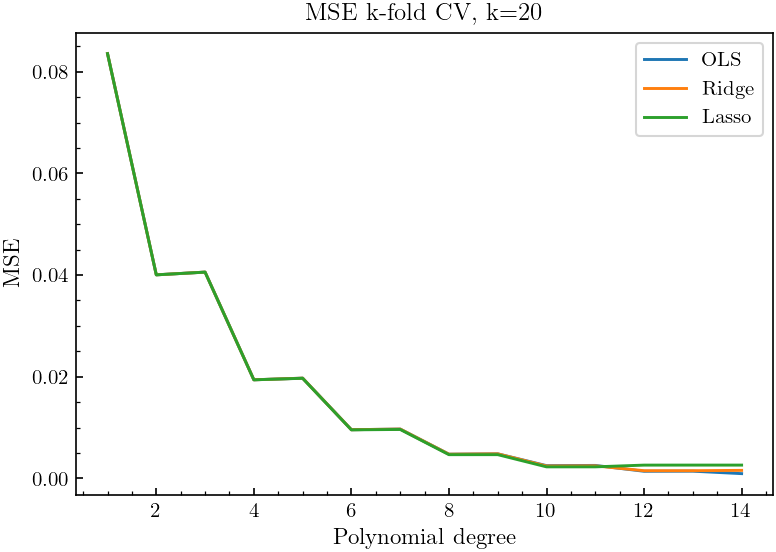

In [63]:
X = x.reshape(-1, 1)

rs = 6114
kfold = KFold(n_splits=20, shuffle=True, random_state=rs)
degrees = range(1, 15)
alpha_fixed = 1e-5

rows = []

mses_ols = []
mses_ridge = []
mses_lasso = []

for deg in degrees:
    poly = PolynomialFeatures(degree=deg, include_bias=False)
    scale = StandardScaler()

    # OLS
    ols_pipe = Pipeline([
        ("poly", poly),
        ("scale", scale),
        ("ols", LinearRegression())
    ])
    ols_scores = cross_val_score(ols_pipe, X, y, cv=kfold, scoring="neg_mean_squared_error")
    ols_mse = -ols_scores.mean()

    # Ridge
    ridge_pipe = Pipeline([
        ("poly", poly),
        ("scale", scale),
        ("ridge", Ridge(alpha=alpha_fixed, fit_intercept=True, random_state=rs))
    ])
    ridge_scores = cross_val_score(ridge_pipe, X, y, cv=kfold, scoring="neg_mean_squared_error")
    ridge_mse = -ridge_scores.mean()

    # Lasso
    lasso_pipe = Pipeline([
        ("poly", poly),
        ("scale", scale),
        ("lasso", Lasso(alpha=alpha_fixed, fit_intercept=True, max_iter=10000000, random_state=rs))
    ])
    lasso_scores = cross_val_score(lasso_pipe, X, y, cv=kfold, scoring="neg_mean_squared_error")
    lasso_mse = -lasso_scores.mean()

    mses_ols.append(ols_mse)
    mses_ridge.append(ridge_mse)
    mses_lasso.append(lasso_mse)

plt.plot(degrees,mses_ols,label="OLS")
plt.plot(degrees,mses_ridge,label="Ridge")
plt.plot(degrees,mses_lasso,label="Lasso")
plt.xlabel("Polynomial degree")
plt.ylabel("MSE")
plt.title(f"MSE k-fold CV, k={20}")
plt.legend()
plt.savefig("Plots/mse_k_fold_20.pdf", bbox_inches="tight")
plt.show()

CV for k = 2

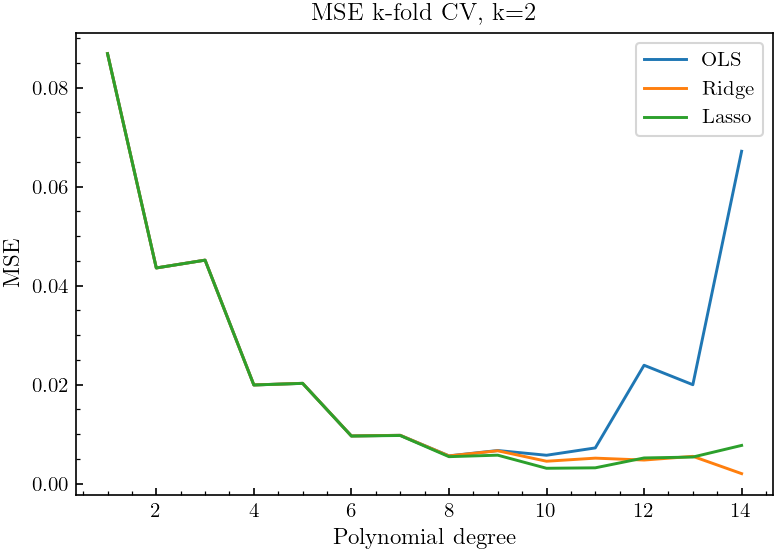

In [77]:
X = x.reshape(-1, 1)

rs = 6114
kfold = KFold(n_splits=2, shuffle=True, random_state=rs)
degrees = range(1, 15)
alpha_fixed = 1e-5

rows = []

mses_ols = []
mses_ridge = []
mses_lasso = []

for deg in degrees:
    poly = PolynomialFeatures(degree=deg, include_bias=False)
    scale = StandardScaler()

    # OLS
    ols_pipe = Pipeline([
        ("poly", poly),
        ("scale", scale),
        ("ols", LinearRegression())
    ])
    ols_scores = cross_val_score(ols_pipe, X, y, cv=kfold, scoring="neg_mean_squared_error")
    ols_mse = -ols_scores.mean()

    # Ridge
    ridge_pipe = Pipeline([
        ("poly", poly),
        ("scale", scale),
        ("ridge", Ridge(alpha=alpha_fixed, fit_intercept=True, random_state=rs))
    ])
    ridge_scores = cross_val_score(ridge_pipe, X, y, cv=kfold, scoring="neg_mean_squared_error")
    ridge_mse = -ridge_scores.mean()

    # Lasso
    lasso_pipe = Pipeline([
        ("poly", poly),
        ("scale", scale),
        ("lasso", Lasso(alpha=alpha_fixed, fit_intercept=True, max_iter=10000000, random_state=rs))
    ])
    lasso_scores = cross_val_score(lasso_pipe, X, y, cv=kfold, scoring="neg_mean_squared_error")
    lasso_mse = -lasso_scores.mean()

    mses_ols.append(ols_mse)
    mses_ridge.append(ridge_mse)
    mses_lasso.append(lasso_mse)

plt.plot(degrees,mses_ols,label="OLS")
plt.plot(degrees,mses_ridge,label="Ridge")
plt.plot(degrees,mses_lasso,label="Lasso")
plt.xlabel("Polynomial degree")
plt.ylabel("MSE")
plt.title(f"MSE k-fold CV, k={2}")
plt.legend()
plt.savefig("Plots/mse_k_fold_2.pdf", bbox_inches="tight")
plt.show()

We felt that the plots did not reflect how the different k values in k-fold cross validation affected the estimates. So we wanted to instead show this with boxplots which showed the distribution of the MSEs.

In [75]:
kfold = KFold(n_splits=20, shuffle=True, random_state=rs)
degrees = list(range(1, 15))
alpha_fixed = 1e-5

# Store per-fold MSEs per degree per model
ols_mses_per_degree = []
ridge_mses_per_degree = []
lasso_mses_per_degree = []

for deg in degrees:
    poly = PolynomialFeatures(degree=deg, include_bias=False)
    scale = StandardScaler()

    # OLS
    ols_pipe = Pipeline([
        ("poly", poly),
        ("scale", scale),
        ("ols", LinearRegression())
    ])
    ols_scores = cross_val_score(ols_pipe, X, y, cv=kfold, scoring="neg_mean_squared_error")
    ols_mses = -ols_scores
    ols_mses_per_degree.append(ols_mses)

    # Ridge
    ridge_pipe = Pipeline([
        ("poly", poly),
        ("scale", scale),
        ("ridge", Ridge(alpha=alpha_fixed, fit_intercept=True, random_state=rs))
    ])
    ridge_scores = cross_val_score(ridge_pipe, X, y, cv=kfold, scoring="neg_mean_squared_error")
    ridge_mses = -ridge_scores
    ridge_mses_per_degree.append(ridge_mses)

    # Lasso
    lasso_pipe = Pipeline([
        ("poly", poly),
        ("scale", scale),
        ("lasso", Lasso(alpha=alpha_fixed, fit_intercept=True, max_iter=10000000, tol=1e-6, random_state=rs))
    ])
    lasso_scores = cross_val_score(lasso_pipe, X, y, cv=kfold, scoring="neg_mean_squared_error")
    lasso_mses = -lasso_scores
    lasso_mses_per_degree.append(lasso_mses)

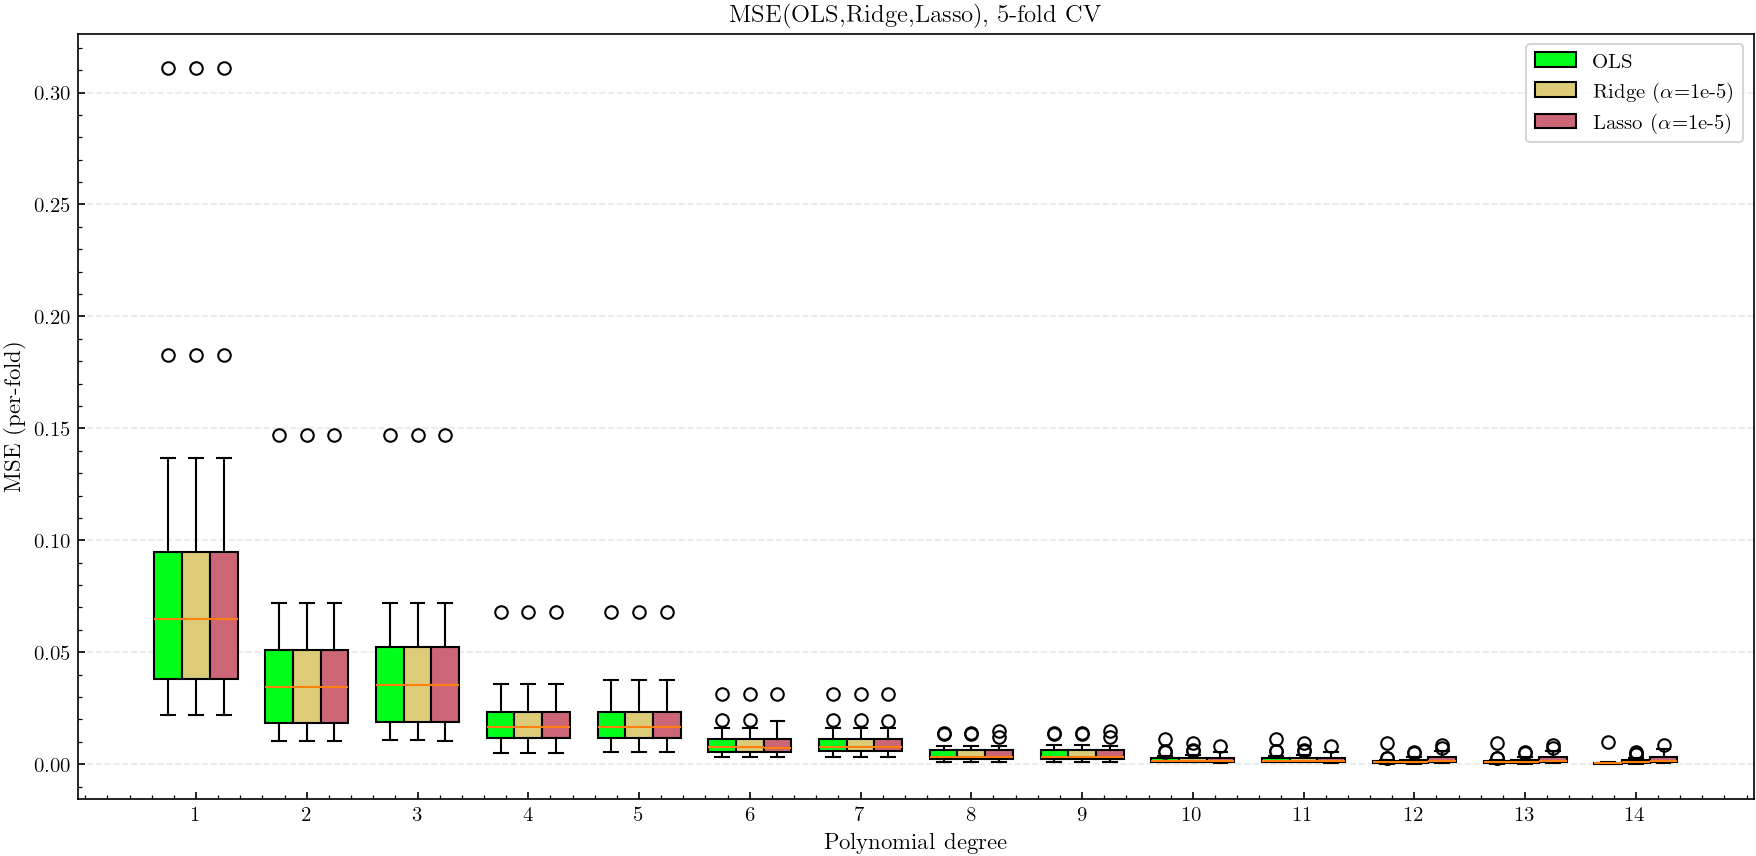

In [76]:
# ---- Grouped boxplots (OLS, Ridge, Lasso side-by-side for each degree) ----
fig, ax = plt.subplots(figsize=(12, 6))

pos = np.arange(len(degrees), dtype=float)
w = 0.25  # box width
# shift positions for the three models
pos_ols   = pos - w
pos_ridge = pos
pos_lasso = pos + w

# Make each boxplot; set patch_artist=True to allow facecolor
bp1 = ax.boxplot(ols_mses_per_degree,   positions=pos_ols,   widths=w, patch_artist=True, manage_ticks=False)
bp2 = ax.boxplot(ridge_mses_per_degree, positions=pos_ridge, widths=w, patch_artist=True, manage_ticks=False)
bp3 = ax.boxplot(lasso_mses_per_degree, positions=pos_lasso, widths=w, patch_artist=True, manage_ticks=False)

# Simple colors
for b in bp1['boxes']: b.set_facecolor("#00ff1a")
for b in bp2['boxes']: b.set_facecolor("#ddcc77")
for b in bp3['boxes']: b.set_facecolor("#cc6677")

ax.set_xticks(pos)
ax.set_xticklabels(degrees)
ax.set_xlabel("Polynomial degree")
ax.set_ylabel("MSE (per-fold)")
ax.set_title(f"MSE(OLS,Ridge,Lasso), 5-fold CV")
ax.legend([bp1["boxes"][0], bp2["boxes"][0], bp3["boxes"][0]],
          [rf"OLS", rf"Ridge ($\alpha$=1e-5)", rf"Lasso ($\alpha$=1e-5)"],
          loc="best")
ax.grid(True, axis="y", alpha=0.3)

plt.tight_layout()
plt.savefig("Plots/mse_kfold_boxplots_grouped_k_5.pdf", bbox_inches="tight")
plt.show()

k = 20

In [67]:
kfold = KFold(n_splits=20, shuffle=True, random_state=rs)
degrees = list(range(1, 15))
alpha_fixed = 1e-5

# Store per-fold MSEs per degree per model
ols_mses_per_degree = []
ridge_mses_per_degree = []
lasso_mses_per_degree = []

for deg in degrees:
    poly = PolynomialFeatures(degree=deg, include_bias=False)
    scale = StandardScaler()

    # OLS
    ols_pipe = Pipeline([
        ("poly", poly),
        ("scale", scale),
        ("ols", LinearRegression())
    ])
    ols_scores = cross_val_score(ols_pipe, X, y, cv=kfold, scoring="neg_mean_squared_error")
    ols_mses = -ols_scores
    ols_mses_per_degree.append(ols_mses)

    # Ridge
    ridge_pipe = Pipeline([
        ("poly", poly),
        ("scale", scale),
        ("ridge", Ridge(alpha=alpha_fixed, fit_intercept=True, random_state=rs))
    ])
    ridge_scores = cross_val_score(ridge_pipe, X, y, cv=kfold, scoring="neg_mean_squared_error")
    ridge_mses = -ridge_scores
    ridge_mses_per_degree.append(ridge_mses)

    # Lasso
    lasso_pipe = Pipeline([
        ("poly", poly),
        ("scale", scale),
        ("lasso", Lasso(alpha=alpha_fixed, fit_intercept=True, max_iter=10000000, tol=1e-6, random_state=rs))
    ])
    lasso_scores = cross_val_score(lasso_pipe, X, y, cv=kfold, scoring="neg_mean_squared_error")
    lasso_mses = -lasso_scores
    lasso_mses_per_degree.append(lasso_mses)

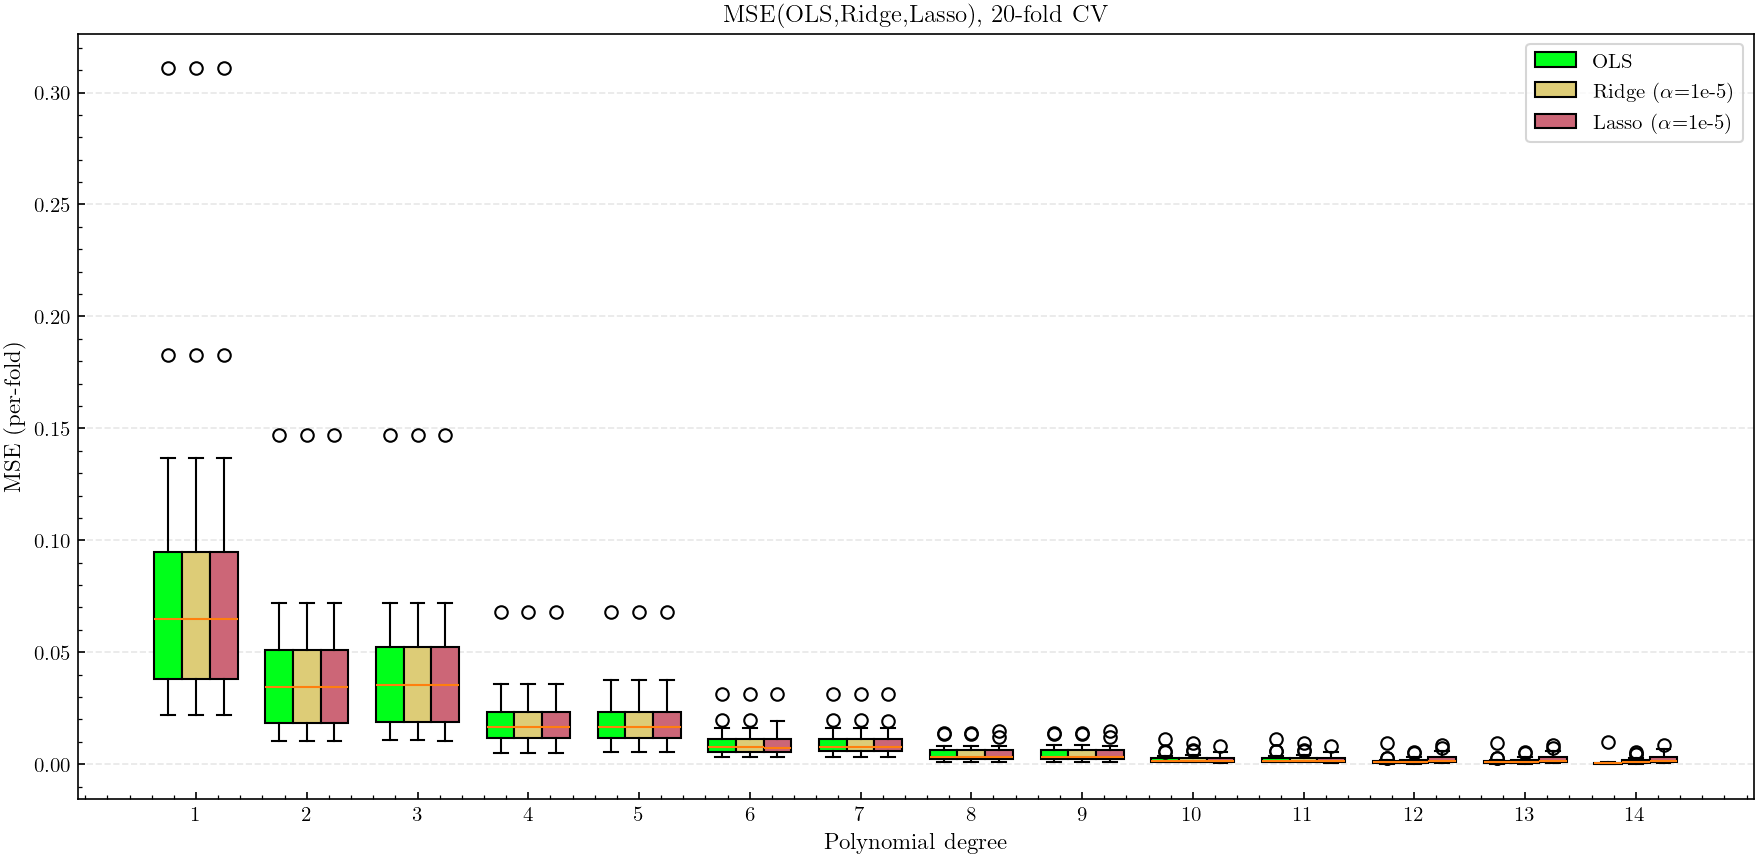

In [68]:
# ---- Grouped boxplots (OLS, Ridge, Lasso side-by-side for each degree) ----
fig, ax = plt.subplots(figsize=(12, 6))

pos = np.arange(len(degrees), dtype=float)
w = 0.25  # box width
# shift positions for the three models
pos_ols   = pos - w
pos_ridge = pos
pos_lasso = pos + w

# Make each boxplot; set patch_artist=True to allow facecolor
bp1 = ax.boxplot(ols_mses_per_degree,   positions=pos_ols,   widths=w, patch_artist=True, manage_ticks=False)
bp2 = ax.boxplot(ridge_mses_per_degree, positions=pos_ridge, widths=w, patch_artist=True, manage_ticks=False)
bp3 = ax.boxplot(lasso_mses_per_degree, positions=pos_lasso, widths=w, patch_artist=True, manage_ticks=False)

# Simple colors
for b in bp1['boxes']: b.set_facecolor("#00ff1a")
for b in bp2['boxes']: b.set_facecolor("#ddcc77")
for b in bp3['boxes']: b.set_facecolor("#cc6677")

ax.set_xticks(pos)
ax.set_xticklabels(degrees)
ax.set_xlabel("Polynomial degree")
ax.set_ylabel("MSE (per-fold)")
ax.set_title(f"MSE(OLS,Ridge,Lasso), 20-fold CV")
ax.legend([bp1["boxes"][0], bp2["boxes"][0], bp3["boxes"][0]],
          [rf"OLS", rf"Ridge ($\alpha$=1e-5)", rf"Lasso ($\alpha$=1e-5)"],
          loc="best")
ax.grid(True, axis="y", alpha=0.3)

plt.tight_layout()
plt.savefig("Plots/mse_kfold_boxplots_grouped_k_20.pdf", bbox_inches="tight")
plt.show()

k = 2

In [69]:
kfold = KFold(n_splits=2, shuffle=True, random_state=rs)
degrees = list(range(1, 15))
alpha_fixed = 1e-5

# Store per-fold MSEs per degree per model
ols_mses_per_degree = []
ridge_mses_per_degree = []
lasso_mses_per_degree = []

for deg in degrees:
    poly = PolynomialFeatures(degree=deg, include_bias=False)
    scale = StandardScaler()

    # OLS
    ols_pipe = Pipeline([
        ("poly", poly),
        ("scale", scale),
        ("ols", LinearRegression())
    ])
    ols_scores = cross_val_score(ols_pipe, X, y, cv=kfold, scoring="neg_mean_squared_error")
    ols_mses = -ols_scores
    ols_mses_per_degree.append(ols_mses)

    # Ridge
    ridge_pipe = Pipeline([
        ("poly", poly),
        ("scale", scale),
        ("ridge", Ridge(alpha=alpha_fixed, fit_intercept=True, random_state=rs))
    ])
    ridge_scores = cross_val_score(ridge_pipe, X, y, cv=kfold, scoring="neg_mean_squared_error")
    ridge_mses = -ridge_scores
    ridge_mses_per_degree.append(ridge_mses)

    # Lasso
    lasso_pipe = Pipeline([
        ("poly", poly),
        ("scale", scale),
        ("lasso", Lasso(alpha=alpha_fixed, fit_intercept=True, max_iter=10000000, tol=1e-6, random_state=rs))
    ])
    lasso_scores = cross_val_score(lasso_pipe, X, y, cv=kfold, scoring="neg_mean_squared_error")
    lasso_mses = -lasso_scores
    lasso_mses_per_degree.append(lasso_mses)

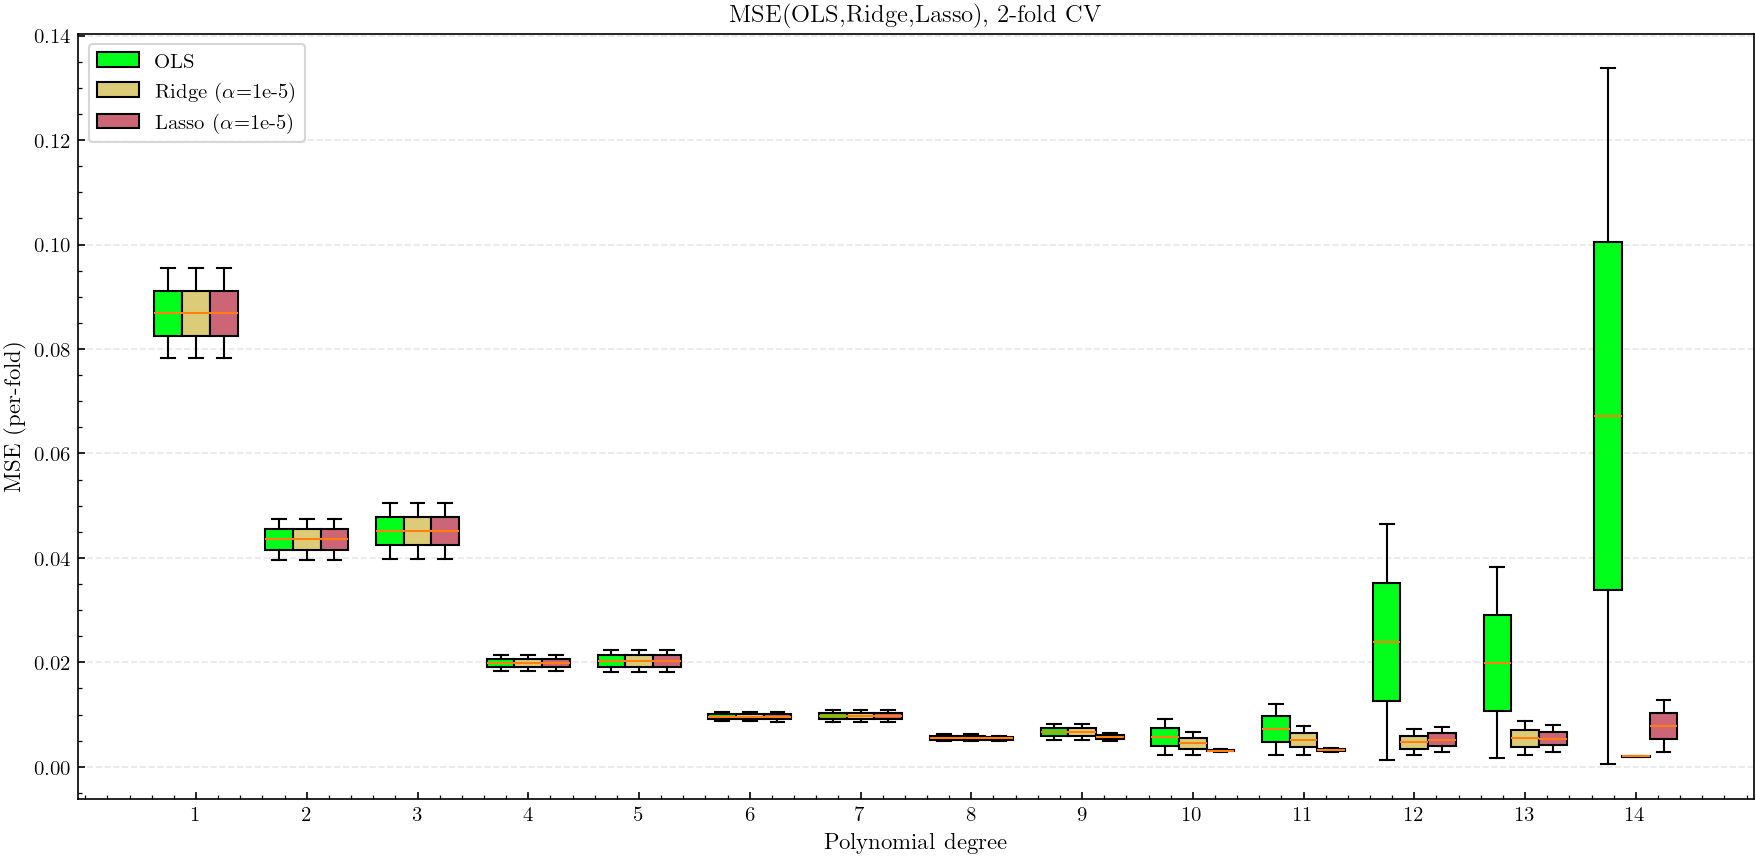

In [70]:
# ---- Grouped boxplots (OLS, Ridge, Lasso side-by-side for each degree) ----
fig, ax = plt.subplots(figsize=(12, 6))

pos = np.arange(len(degrees), dtype=float)
w = 0.25  # box width
# shift positions for the three models
pos_ols   = pos - w
pos_ridge = pos
pos_lasso = pos + w

# Make each boxplot; set patch_artist=True to allow facecolor
bp1 = ax.boxplot(ols_mses_per_degree,   positions=pos_ols,   widths=w, patch_artist=True, manage_ticks=False)
bp2 = ax.boxplot(ridge_mses_per_degree, positions=pos_ridge, widths=w, patch_artist=True, manage_ticks=False)
bp3 = ax.boxplot(lasso_mses_per_degree, positions=pos_lasso, widths=w, patch_artist=True, manage_ticks=False)

# Simple colors
for b in bp1['boxes']: b.set_facecolor("#00ff1a")
for b in bp2['boxes']: b.set_facecolor("#ddcc77")
for b in bp3['boxes']: b.set_facecolor("#cc6677")

ax.set_xticks(pos)
ax.set_xticklabels(degrees)
ax.set_xlabel("Polynomial degree")
ax.set_ylabel("MSE (per-fold)")
ax.set_title(f"MSE(OLS,Ridge,Lasso), 2-fold CV")
ax.legend([bp1["boxes"][0], bp2["boxes"][0], bp3["boxes"][0]],
          [rf"OLS", rf"Ridge ($\alpha$=1e-5)", rf"Lasso ($\alpha$=1e-5)"],
          loc="best")
ax.grid(True, axis="y", alpha=0.3)

plt.tight_layout()
plt.savefig("Plots/mse_kfold_boxplots_grouped_k_2.pdf", bbox_inches="tight")
plt.show()